In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import time
import seaborn as sns

In [2]:
# Dependencies
import tweepy

# Twitter API Keys
consumer_key = 'fK8U8bWT7yIN2KeDS6jyCHoIT'
consumer_secret = 'IXDSv8qlGT4cqfySugHMhkMZuKISzKZwNPgg5JDVxUBgt7DPor'
access_token = '3374732158-c1ivktJTEuRN1X4bfgX2LC3xIzTBuOExpmgPjZ0'
access_token_secret = 'uhF6rgYMEQUOIcdSoTpmwv1Jym4cZhdf4gdMQZ8ke1SQD'

# Twitter Credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Target User Accounts
target_user = ("@bbc", "@cbs", "@cnn", "@fox", "@nytimes")

score_list = []

detail_df = pd.DataFrame(columns=['media','compound','positive','neutral','negative','tweets ago'])

In [5]:
# Loop through each user
for user in target_user:
    
    # Counter
    counter = 1
    
    # Variables for holding sentiments
    media_list = []
    compound_list = []
    positive_list = []
    neutral_list = []
    negative_list = []
    tweets_ago_list = []

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):
        
        # Get all tweets from home feed
        public_tweets = api.user_timeline(user)
        
        # Loop through all tweets
        for tweet in public_tweets:
            
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            
            # Add each value to the appropriate array
            media_list.append(user)
            compound_list.append(compound)
            positive_list.append(pos)
            neutral_list.append(neu)
            negative_list.append(neg)
            tweets_ago_list.append(tweets_ago)
            
            # Add to counter 
            counter = counter + 1
            
    temp_df = pd.DataFrame({'media': media_list,
                            'compound': compound_list,
                            'positive': positive_list,
                            'neutral': neutral_list,
                            'negative': negative_list,
                            'tweets ago': tweets_ago_list
                             })
    
    detail_df = detail_df.append(temp_df, ignore_index=True)
            
    # Calculate Averages
    average_compound = np.mean(compound_list)
    average_positive = np.mean(positive_list)
    average_neutral = np.mean(neutral_list)
    average_negative = np.mean(negative_list)

    # Create Dictionary
    averages = {"News Outlet": user,
                "# of Tweets": len(compound_list),
                "Average Compound": average_compound, 
                "Average Positive": average_positive, 
                "Average Neutral": average_neutral,
                "Average Negative": average_negative}
    
    # Add each news mood to the list
    score_list.append(averages)

# Create Dataframe
df = pd.DataFrame(score_list)

In [6]:
detail_df.to_csv('output.csv', sep='\t', encoding='utf-8')

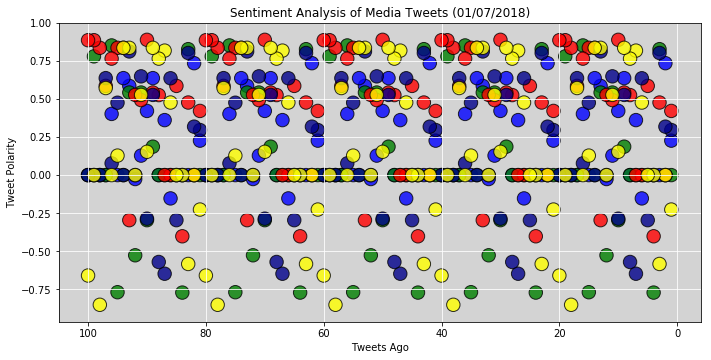

In [7]:
plt.figure(num=None, figsize=(11.5, 5.5), facecolor='white', edgecolor='white')

colors = {"@bbc":'blue', "@cbs":'green', "@cnn":'red', "@fox":'darkblue', "@nytimes": "yellow"}

plt.scatter(detail_df['tweets ago'], detail_df['compound'], 
            marker = "o", s = 180, edgecolors = 'black', 
            c=detail_df['media'].apply(lambda x: colors[x]), alpha = 0.8)

plt.gca().invert_xaxis()

plt.gca().set_facecolor('lightgrey')

plt.grid(b=True, color='white')

plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.title("Sentiment Analysis of Media Tweets (01/07/2018)")

plt.show()

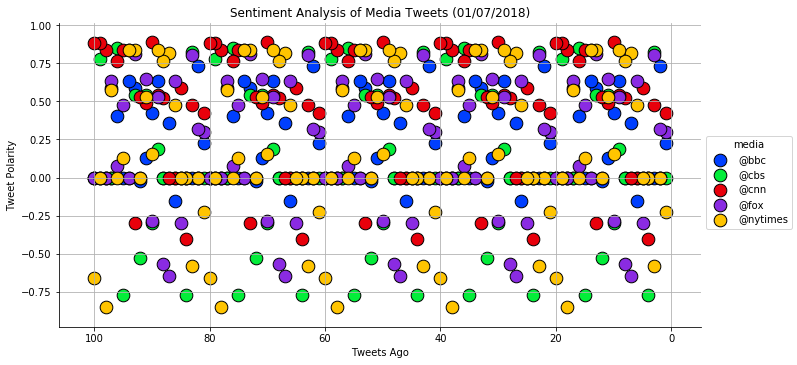

In [8]:
# Use Seaborn

g = sns.lmplot(x='tweets ago', y='compound', data=detail_df,
               fit_reg=False, 
               hue='media',
               palette="bright",
               scatter_kws={"marker": "o",
                            "edgecolors": 'black',
                            "s": 160,
                            "alpha": 1},
               aspect = 2,
               legend_out=True) 

plt.grid(True)

g = (g.set_axis_labels("Tweets Ago","Tweet Polarity").set())

plt.gca().invert_xaxis()

plt.title("Sentiment Analysis of Media Tweets (01/07/2018)")

plt.show()

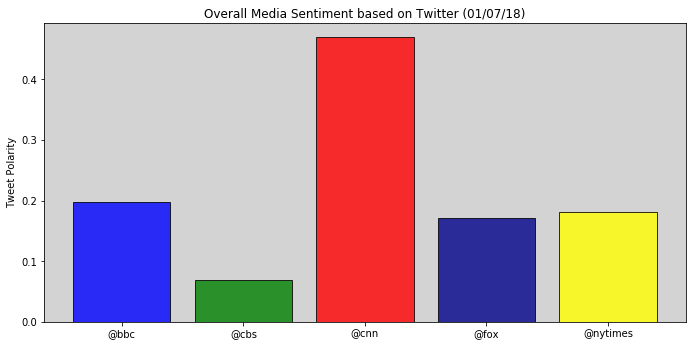

In [9]:
plt.figure(num=None, figsize=(11.5, 5.5), facecolor='white', edgecolor='white')

colors = {"@bbc":'blue', "@cbs":'green', "@cnn":'red', "@fox":'darkblue', "@nytimes": "yellow"}

plt.bar(df['News Outlet'], df['Average Compound'],
        edgecolor = 'black', 
        color=df['News Outlet'].apply(lambda x: colors[x]), alpha = 0.8)


plt.gca().set_facecolor('lightgrey')

plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment based on Twitter (01/07/18)")

plt.show()